In [1]:
import numpy as np, pandas as pd, re, scipy as sp, scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactiveshell='all'


In [10]:
#Importing Dataset
pd.options.mode.chained_assignment = None
Data = pd.read_csv("D:\SEM 4\DAB402 - CAPSTONE PROJECT\Online Retail_1.csv", dtype= {'CustomerID': 'Int64'}, encoding= 'unicode_escape')
Data.info()
Data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  Int64  
 7   Country      541909 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 33.6+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850,United Kingdom


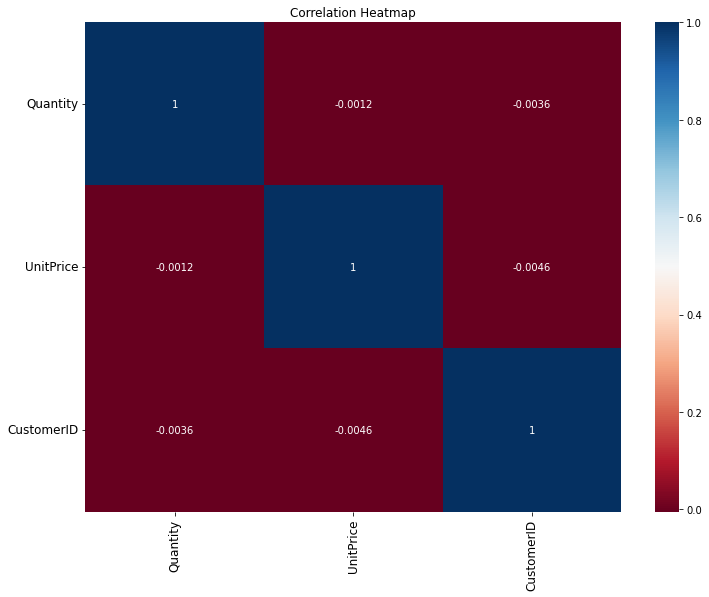

In [11]:

# A plot of the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# I'll use  viridis as a color scheme, and also use , Blues, and YlGnBu as I've used RdBu in the previous cell.
plt.figure(figsize = (12, 9))
s = sns.heatmap(Data.corr(),
               annot = True, 
               cmap = 'RdBu')
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
#Strings
Data['Description'] = Data['Description'].str.replace('.','').str.upper().str.strip()
Data['Description'] = Data['Description'].replace('\s+',' ',regex = True)
Data['InvoiceNo'] = Data['InvoiceNo'].astype(str).str.upper()
Data['StockCode'] = Data['StockCode'].str.upper()
Data['Country'] = Data['Country'].str.upper()
Data.head()

<ipython-input-12-d96fd565efd7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Data['Description'] = Data['Description'].str.replace('.','').str.upper().str.strip()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,12-01-2010 08:26,3.39,17850,UNITED KINGDOM


In [13]:
#Listing Some Irrelevant StockCodes
Irrelevant = Data['StockCode'].unique()
Irrelevant.sort()
print('Irrelevant Transactions: \n',Irrelevant[::-1][:4])
#Quantity and UnitPrice Summary
Data.describe().iloc[:,:2]
#As it is obvious in the summary of our dataset, we have some odd and irregular values in the 'UnitPrice' and 'Quantity'
#columns that we will find and remove to prevent them from negatively affect our analysis. In the 'StockCode' variable
#we can see that some of the transaction are not actually products,
#but they are some costs or fees regarding to the post or bank or other tansactions that we don't really need in our data.

Irrelevant Transactions: 
 ['S' 'POST' 'PADS' 'M']


,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [14]:
#Outliers and Irrelevant Values
#Dropping all stockcodes that contain only strings
CodeTypes = list(map(lambda codes: any(char.isdigit() for char in codes), Data['StockCode']))
IrrelevantCodes = [i for i,v in enumerate(CodeTypes) if v == False]
Data.drop(IrrelevantCodes , inplace = True)

#Removing Outliers Based on Z-score
Data = Data[(np.abs(sp.stats.zscore(Data['UnitPrice']))<3) & (np.abs(sp.stats.zscore(Data['Quantity']))<5)]
count_row = Data.shape[0]
count_row

535268

In [21]:
# Missing & Incorrect Values
Data.drop(Data[(Data.Quantity>0) & (Data.InvoiceNo.str.contains('C') == True)].index, inplace = True)
Data.drop(Data[(Data.Quantity<0) & (Data.InvoiceNo.str.contains('C') == False)].index, inplace = True)
Data.drop(Data[Data.Description.str.contains('?',regex=False) == True].index, inplace = True)
Data.drop(Data[Data.UnitPrice == 0].index, inplace = True)

for index,value in Data.StockCode[Data.Description.isna()==True].items():
    if pd.notna(Data.Description[Data.StockCode == value]).sum() != 0:
        Data.Description[index] = Data.Description[Data.StockCode == value].mode()[0]
    else:
        Data.drop(index = index, inplace = True)
        
Data['Description'] = Data['Description'].astype(str)
count_row = Data.shape[0]
count_row

532820

In [15]:
#Country

Data.Country.value_counts(normalize=True)
#We can see that there is maximum proportion (More than 90% of customers) 
#of 'United Kingdom' customers. So we will take 'United Kingdom' customer for our analysis.

UNITED KINGDOM          0.915919
GERMANY                 0.016962
FRANCE                  0.015372
EIRE                    0.015049
SPAIN                   0.004600
NETHERLANDS             0.004331
SWITZERLAND             0.003677
BELGIUM                 0.003671
PORTUGAL                0.002750
AUSTRALIA               0.002346
NORWAY                  0.001971
ITALY                   0.001461
CHANNEL ISLANDS         0.001403
FINLAND                 0.001218
CYPRUS                  0.001138
UNSPECIFIED             0.000833
SWEDEN                  0.000816
AUSTRIA                 0.000723
DENMARK                 0.000701
JAPAN                   0.000659
POLAND                  0.000622
ISRAEL                  0.000549
USA                     0.000544
HONG KONG               0.000519
SINGAPORE               0.000398
ICELAND                 0.000340
CANADA                  0.000280
GREECE                  0.000263
MALTA                   0.000230
UNITED ARAB EMIRATES    0.000125
EUROPEAN C

In [16]:
#Customers with Different Countries
Customers = Data.groupby('CustomerID')['Country'].unique()
Customers.loc[Customers.apply(lambda x:len(x)>1)]

CustomerID
12370           [CYPRUS, AUSTRIA]
12394          [BELGIUM, DENMARK]
12417            [BELGIUM, SPAIN]
12422    [AUSTRALIA, SWITZERLAND]
12429          [DENMARK, AUSTRIA]
12431        [AUSTRALIA, BELGIUM]
12455             [CYPRUS, SPAIN]
12457       [SWITZERLAND, CYPRUS]
Name: Country, dtype: object

In [22]:

#Fixing Duplicate CustomerIDs
for i,v in Data.groupby('CustomerID')['Country'].unique().items():
    if len(v)>1:
        Data.Country[Data['CustomerID'] == i] = Data.Country[Data['CustomerID'] == i].mode()[0]

#Adding Desired Features
Data['FinalPrice'] = Data['Quantity']*Data['UnitPrice']
Data['InvoiceMonth'] = pd.DatetimeIndex(Data['InvoiceDate']).strftime('%b')
Data['Day of week'] = pd.DatetimeIndex(Data['InvoiceDate']).strftime('%A')
Data['Date'] = pd.DatetimeIndex(Data['InvoiceDate']).strftime('%Y-%m')


In [23]:
#Exporting Processed Data
Data.to_csv(r'D:/SEM 4/DAB402 - CAPSTONE PROJECT/Cleansed_Dataset/OnlineRetail_Cleaned.csv', date_format = '%Y-%m-%d %H:%M', index = False)